# Hyperspy ELNES
Load the library:

In [151]:
import hyperspy.api as hs
import matplotlib.pyplot as plt

Loading the data sets (from EELS ATLAS) :

In [152]:
LiF_ll  = hs.load("LiF(0-0170eV).msa")
LiF_hl = hs.load("LiF(0-0910eV).msa")

#signal type
LiF_ll.set_signal_type("EELS")
LiF_hl.set_signal_type("EELS")

#experimental parameters
LiF_ll.set_microscope_parameters(beam_energy=200,convergence_angle=2,collection_angle=0.4)
LiF_hl.set_microscope_parameters(beam_energy=200,convergence_angle=2,collection_angle=100)


Plotting some data

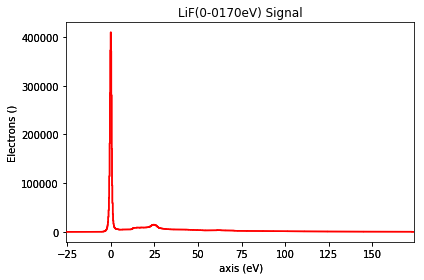

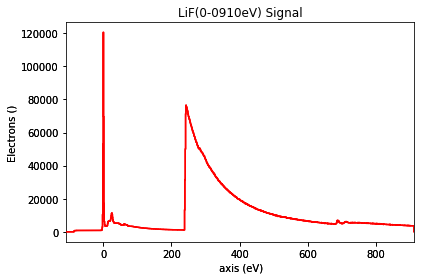

In [153]:
LiF_ll.plot()
LiF_hl.plot()
plt.show()

Picking out edges, ZLP:

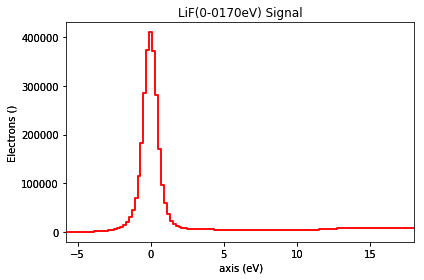

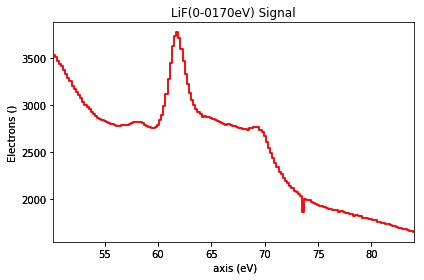

In [154]:
ZLP_plasmons = LiF_ll.isig[100:220]
#uncomment  the next two lines to plot:
ZLP_plasmons.plot()
plt.show()

Li_edge = LiF_ll.isig[380:550]
#uncomment the next two lines to plot:
Li_edge.plot()
plt.show()

F_edge = LiF_hl.isig[700:950]
#uncomment the next two lines to plot:
#F_edge.plot()
#plt.show()


#### Background removal


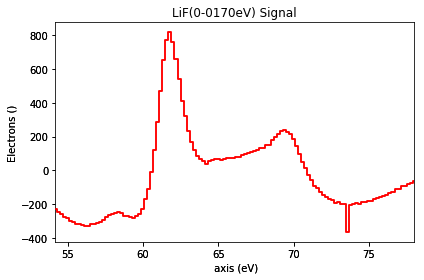

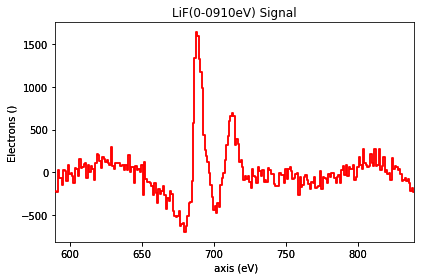

In [155]:
#play with the values in the tuple to alter window size/location
Li_no_bg = Li_edge.remove_background((15,50),background_type='Polynomial', polynomial_order=3).isig[20:-30]
Li_no_bg.plot()
plt.show()

#could not get this to work with power law, used high order polynomial instead
F_no_bg = F_edge.remove_background((50,75),background_type='Polynomial', polynomial_order=5)
F_no_bg.plot()
plt.show()


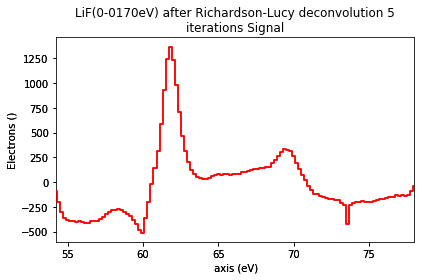

In [156]:
#a little noisy, needs low loss and edge to have the same number of bins, in this case 120
#swapping the .plot() for a .save("filename.msa") will save the result to the working direcotry
Li_no_bg.richardson_lucy_deconvolution(ZLP_plasmons,iterations=5).plot() #.save("LiF_decon.msa")
plt.show()